In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [155]:
df= pd.read_csv(r"C:\Users\mapze\OneDrive\Documents\Python Scripts\heart.csv")

In [156]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


1    526
0    499
Name: target, dtype: int64


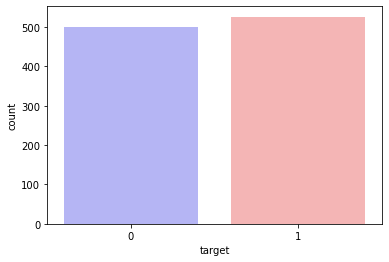

Percentage of Patients Without Heart Disease:48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [157]:
#Exploratory Analysis
print(df.target.value_counts())
sns.countplot(x="target", data=df, palette="bwr")
plt.show()
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Without Heart Disease:{:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


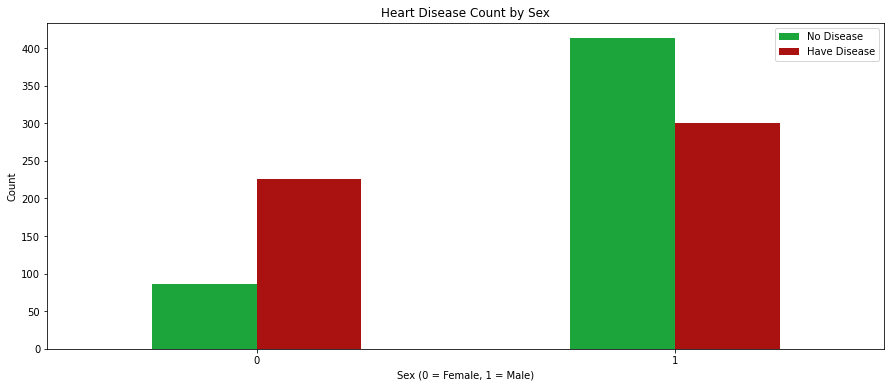

In [158]:
'''Heart Disease by Sex'''
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Count by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Count')
plt.show()

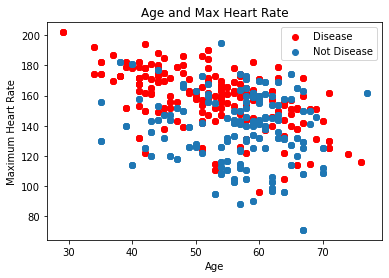

In [159]:
'''Heart Disease by Max Heart Rate and Age'''
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.title('Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

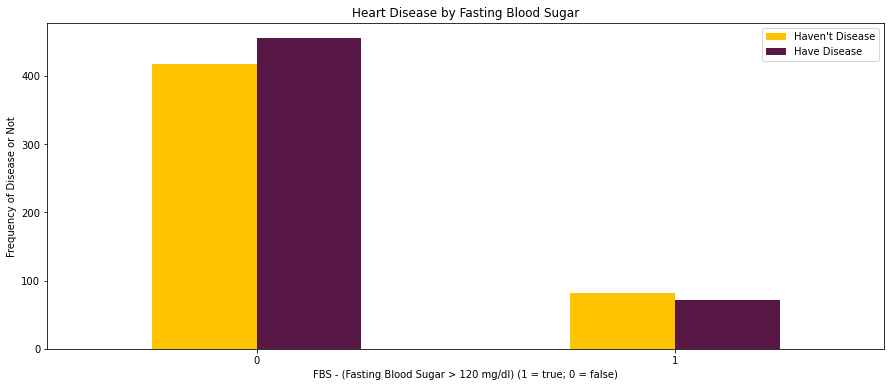

In [160]:
'''Fasting Blood Sugar'''
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease by Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

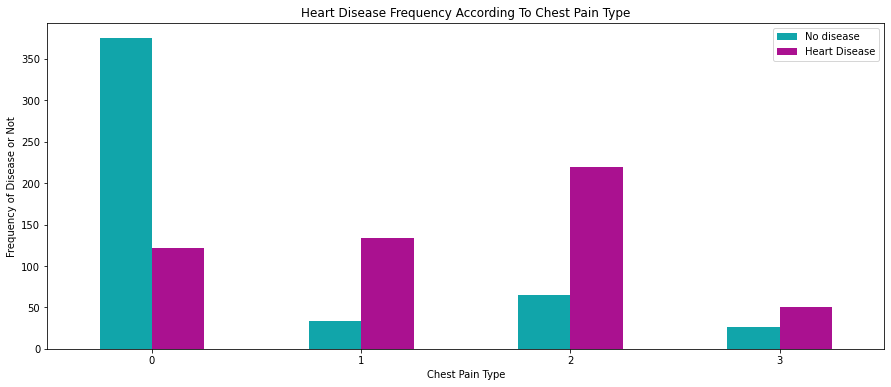

In [161]:
'''Chest Pain Type'''
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["No disease","Heart Disease"])
plt.show()

In [162]:
#Change Column Names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

In [163]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [164]:
pd.options.mode.chained_assignment = None  
#Change Values
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = '< 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = '> 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'


In [165]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [166]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,< 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversible defect,0
1,53,male,typical angina,140,203,> 120mg/ml,normal,155,yes,3.1,upsloping,0,reversible defect,0
2,70,male,typical angina,145,174,< 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversible defect,0
3,61,male,typical angina,148,203,< 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversible defect,0
4,62,female,typical angina,138,294,> 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,< 120mg/ml,ST-T wave abnormality,164,yes,0.0,downsloping,0,fixed defect,1
1021,60,male,typical angina,125,258,< 120mg/ml,normal,141,yes,2.8,flat,1,reversible defect,0
1022,47,male,typical angina,110,275,< 120mg/ml,normal,118,yes,1.0,flat,1,fixed defect,0
1023,50,female,typical angina,110,254,< 120mg/ml,normal,159,no,0.0,downsloping,0,fixed defect,1


In [167]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate               int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
number_major_vessels         int64
thalassemia                 object
target                       int64
dtype: object

In [168]:
df = pd.get_dummies(df, drop_first=True)


In [169]:
df

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,number_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_> 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversible defect
0,52,125,212,168,1.0,2,0,1,0,0,1,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,1,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
1021,60,125,258,141,2.8,1,0,1,0,0,1,0,0,1,1,1,0,0,1
1022,47,110,275,118,1.0,1,0,1,0,0,1,0,0,1,1,1,0,0,0
1023,50,110,254,159,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [170]:
'''Make target variable the output'''
y = df.target.values
X= df.drop(['target'], axis = 1)

In [171]:
X

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,number_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_> 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversible defect
0,52,125,212,168,1.0,2,1,0,0,1,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,1,1,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,1,0,0,1,0,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,1,0,0,0,0,0,1,0,0,0,0
1021,60,125,258,141,2.8,1,1,0,0,1,0,0,1,1,1,0,0,1
1022,47,110,275,118,1.0,1,1,0,0,1,0,0,1,1,1,0,0,0
1023,50,110,254,159,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [172]:
'''Split data into 70% train and 30% test'''
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=44)
print(X_train.shape,X_test.shape)

(717, 18) (308, 18)


In [173]:
'''Use grid search to find best random forest model'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
print(results_df)

Best: [0.84527001 0.8368007  0.84798951 0.96787102 0.96368493 0.96091686
 0.95811966 0.96508353 0.96508353], using {'max_depth': 8, 'n_estimators': 64}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.071845      0.014888         0.006430        0.007371   
1       0.133383      0.008450         0.007935        0.006990   
2       0.262111      0.016385         0.015103        0.001015   
3       0.084017      0.007117         0.003051        0.006101   
4       0.155142      0.006974         0.007910        0.006594   
5       0.291810      0.009022         0.024141        0.006159   
6       0.073138      0.006523         0.009308        0.007601   
7       0.158570      0.010974         0.009988        0.006967   
8       0.302177      0.013364         0.017300        0.003317   

  param_max_depth param_n_estimators                                  params  \
0               2                 64    {'max_depth': 2, 'n_estimators': 64}   
1               2

In [174]:
#Make Random Forest with the optimal parameters
FinalForest=RandomForestClassifier(n_estimators=128,max_depth=8,max_features='sqrt')

#Train Model
FinalForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=128)

In [175]:
#Predictions on test set
y_pred = FinalForest.predict(X_test)

In [176]:
#Get Accuracy and AUC of Random Forest on the Test Set
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("AUC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.9805194805194806
AUC: 0.9810126582278481


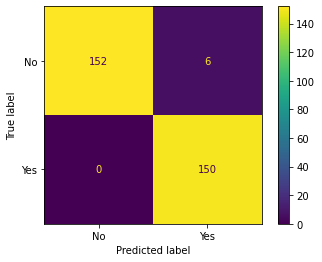

In [177]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ['No', 'Yes'])


cm_display.plot()

In [178]:
#Random Forest Feature Importances
importances= FinalForest.feature_importances_

columns=X.columns
i=0

while i < len(columns):
    print("The importance of {} is {}%".format(columns[i],round(importances[i]*100,2)))
    i += 1

The importance of age is 8.29%
The importance of resting_blood_pressure is 6.62%
The importance of cholesterol is 6.78%
The importance of max_heart_rate is 11.86%
The importance of st_depression is 11.54%
The importance of number_major_vessels is 10.81%
The importance of sex_male is 3.2%
The importance of chest_pain_type_atypical angina is 1.33%
The importance of chest_pain_type_non-anginal pain is 2.91%
The importance of chest_pain_type_typical angina is 12.94%
The importance of fasting_blood_sugar_> 120mg/ml is 1.0%
The importance of rest_ecg_left ventricular hypertrophy is 0.03%
The importance of rest_ecg_normal is 1.72%
The importance of exercise_induced_angina_yes is 6.6%
The importance of st_slope_flat is 3.12%
The importance of st_slope_upsloping is 0.74%
The importance of thalassemia_normal is 0.5%
The importance of thalassemia_reversible defect is 9.99%


In [179]:
from sklearn.inspection import permutation_importance


In [180]:
import eli5

In [181]:
from eli5.sklearn import PermutationImportance


In [182]:
perm = PermutationImportance(FinalForest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0630 ± 0.0335,number_major_vessels
0.0481 ± 0.0357,thalassemia_reversible defect
0.0481 ± 0.0194,chest_pain_type_typical angina
0.0429 ± 0.0181,st_depression
0.0344 ± 0.0120,age
0.0279 ± 0.0052,max_heart_rate
0.0214 ± 0.0052,sex_male
0.0214 ± 0.0134,cholesterol
0.0201 ± 0.0064,exercise_induced_angina_yes
0.0143 ± 0.0088,st_slope_flat


In [183]:
import shap

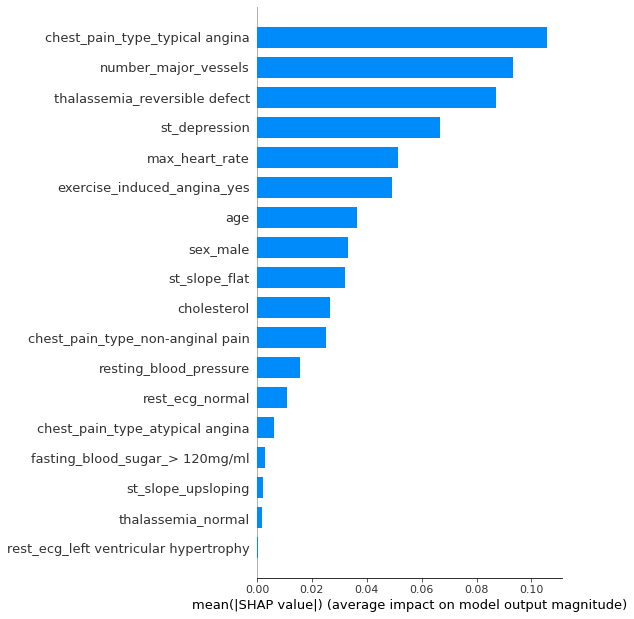

In [184]:
explainer = shap.TreeExplainer(FinalForest)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")